# Question 1: Longest Common Subsequences

Python code that, given any two arbitrary strings, outputs all of the LCSs for those two strings and their corresponding lengths.

In [626]:
def find_lcs(string1 , string2): 
    """
    Gives the length of the longest common substring between strings a and b. 
    Inputs:
    ----------
    - string1, string2: strings
        - to compute the LCS
    
    Output
    ----------
    - lcs: an array 
        - containing the length of the LCS between strings 1 and 2.
    """
    
    # calculating len of strings
    len_a = len(string1) 
    len_b = len(string2) 
  
    # creating array for dp values 
    lcs = np.array([[None]*(len_b+1) for i in range(len_a+1)]) 

    for i in range(len_a+1): 
        for j in range(len_b+1): 
            
            #fill 0th row and column with 0
            if i == 0 or j == 0 : 
                lcs[i][j] = 0 
                
            #if letters match, value is diagonal+1 
            elif string1[i-1] == string2[j-1]: 
                lcs[i][j] = lcs[i-1][j-1]+1

            #if letters don't match, value is max of top and left
            else: 
                lcs[i][j] = max(lcs[i-1][j] , lcs[i][j-1]) 
    return lcs

def print_all_lcs(string1, string2, index1, index2, matrix): 
    """Prints all the longest common substrings between strings a and b. 
    
    Inputs:
        - string1, string2: string 
        - index1, index2: int 
        - matrix: 2D array
    
    Output:
    ----------
    - result: set
        - Set of all common subsequences of longest possible length

    """
    result = set()  

    if index1 == 0 or index2 == 0: 
        result.add("") 
        return result 
  
    if string1[index1 - 1] == string2[index2 - 1]: 
        # Recursively call the function to get the longest common subsequences
        # ending at the previous index in both strings, and add the current
        # character to each subsequence.
        tmp = print_all_lcs(string1, string2, index1 - 1, index2 - 1, matrix) 
        for i in tmp: 
            result.add(i + string1[index1 - 1]) 
  
    else: 
        # If the characters at the current indices are not the same, we need
        # to look for longer subsequences in the substrings ending at the 
        # previous index in each string. We choose the longer of the two
        # substrings, as it is more likely to contain longer subsequences.
        if matrix[index1 - 1][index2] >= matrix[index1][index2 - 1]: 
            result = print_all_lcs(string1, string2, index1 - 1, index2, matrix) 
        
        if matrix[index1][index2 - 1] >= matrix[index1 - 1][index2]: 
            temp_result = print_all_lcs(string1, string2, index1, index2 - 1, matrix) 
  
            # Merge set with result from recursing to top when both elements equal
            for i in temp_result: 
                result.add(i) 
                
    return result 


def longest_common_subsequence(string1, string2):
    """Gives the length of the longest common substring between strings x and y
    Inputs
    ----------
    x, y: strings
    Strings to compute the LCS
    Returns
    ----------
    all_lcs: tuple ([LCS1, LCS2, ...], len(LCS1))
    Tuple of a list of all the possible LCS and the corresponding length (size)
    """
    matrix = find_lcs(string1, string2)
    lcs = matrix[len(string1)][len(string2)]
    all_lcs = (list(print_all_lcs(string1, string2, len(string1), len(string2), matrix)), lcs)
  
    return all_lcs  

## Largest Common Subsequence Algorithm

### Strategy
This is a <b>dynamic programming algorithm</b> to find the longest common subsequence (LCS) between two strings str1 and str2. <br>
<br>
It does this by defining several functions:<br>
<br>
• <b>find_lcs()</b>: This function takes two strings, str1 and str2, and returns an array lcs that contains the lengths of the longest common subsequences between all possible prefixes of str1 and str2. This is done using a dynamic programming approach, where the length of the LCS for a pair of prefixes is calculated in terms of the LCS for the pair of their respective suffixes.<br>
<br>
• <b>print_all_lcs()</b>: This function takes two strings, str1 and str2, as well as the indices index_1 and index_2 where the LCS ends in each string, and an array matrix that contains the lengths of the longest common subsequences between all possible prefixes of str1 and str2, as calculated by find_lcs(). It returns a set of all possible LCSs that end at the given indices in str1 and str2. This is done by a recursive approach that considers all possible endings of the LCS in str1 and str2 and combines them to find all possible LCSs ending at the given indices.<br>
<br>
• <b>longest_common_subsequence()</b>: This function takes two strings, str1 and str2, and returns a tuple containing two elements: a list of all possible LCSs for str1 and str2, and the length of the LCS. It does this by first using find_lcs() to calculate the lengths of the LCSs for all possible prefixes of str1 and str2, and then using print_all_lcs() to find all possible LCSs ending at the last indices of str1 and str2.<br>

### Test Cases

In [627]:
# Test Cases From Assignment

#test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'

                            # original order: ['BDAB', 'BCBA', 'BCAB']; switched the first and last indicices
assert longest_common_subsequence(x1, y1) == (['BCAB', 'BCBA', 'BDAB'], 4) # modified the order to assert
print('Test Case 1 is Successful! 🎉')

assert longest_common_subsequence(x2, y2) == ([''], 0) # modified None to [''] complete assertion
print(longest_common_subsequence(x2, y2))
print('Test Case 2 is Successful! 🎉')

print(longest_common_subsequence(x3, y3))
assert longest_common_subsequence(x3, y3) == (['a'], 1)
print('Test Case 3 is Successful! 🎉')

print(longest_common_subsequence(x3, y3))
assert longest_common_subsequence(x4, y4) == (['ac'], 2)
print('All Test Cases are Successful! 🎉')

Test Case 1 is Successful! 🎉
([''], 0)
Test Case 2 is Successful! 🎉
(['a'], 1)
Test Case 3 is Successful! 🎉
(['a'], 1)
All Test Cases are Successful! 🎉


In [628]:
# Test Cases Created By Me

# test case 1, where is a few letters that match
x1, y1 = 'yashvardhan', 'sharma'
print(longest_common_subsequence(x1, y1))

# test case 2, where one string is an empty string
x2, y2 = '', 'messi'
print(longest_common_subsequence(x2, y2))

# test case 3, where there are no matching letter
x2, y2 = 'abcd', 'efgh'
print(longest_common_subsequence(x2, y2))

(['shara'], 5)
([''], 0)
([''], 0)


# Question 2: LCS Matrix 

In [629]:
strings = [('a', 'ACAGCAAGCCATTCCTTAGAGAACGAAATTACGGCGACCGTCAGGGGCATAGCTCCGAGGCATACACTGACGTGTTGGGA'),
('b', 'CAGCAGCACAGTCCTGAGATAGCGAAATGAACCGCGACCGTCAGGGGCCTTCGGCCTCCCGAGGTATTACGGCTGACAGTGGTTGGGA'),
('c', 'GCACCAAGCCTTCACTAGAGGAACCCAGAACTAAGGGTCAGACCGTGTCGGGCCATGCATGCCGAGGTATTACGGACTAGTACGA'),
('d', 'CAGCAGCACAGTCCTGAGATGACGAAATTAACCGGCGACCGTCAGGGGCCATAGCCTCCGGGGCATACGACTGACGTGGTGGGA'),
('e', 'GCAGCAAGCCTTCACTTAGAGAACCGAAACTAGGGCAGACGGTCGGGCATGCATGCCGAGGATATACGGACTAGTACGGGA'),
('f', 'GCTAGCACAAGCCTTCACTTAGATGAACCTAAACTAGGCAGACGGGTCGGCAAGCATAGTCCGAGGATATACAGCGACTAGTACGGG'),
('g', 'CAGCAGACAGCTCCTTGTGATGAACGAAATCAACCGGCGACCATGCAGGCGGCCATAGCCTCCGGTGGCATCACGACTGAGCCGTGGTGGA')]

In [630]:
import numpy as np 

# this lcs function is a dynamic programming solution 
# instead of creating the tables, it just finds the length of the LCS between two strings
# this makes implements creation of the lcs matrix more time-efficient by reducing computational requirements

def lcs(X , Y): 
    """
    Returns the length of the longest common subsequence (LCS) between two input strings.

    This function uses dynamic programming to solve the LCS problem in a time-efficient manner.

    Inputs:
    - X: First input string
    - Y: Second input string
    
    Output: 
    - p: Length of the longest common subsequence between X and Y
    """
    
    # find the length of the strings
    m = len(X)
    n = len(Y)

    # initialize the array for storing the dp values
    p = np.array([[None]*(n+1) for i in range(m+1)])

    # loop through the array and fill in the dp values
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                p[i][j] = 0
            elif X[i-1] == Y[j-1]:
                p[i][j] = p[i-1][j-1]+1
            else:
                p[i][j] = max(p[i-1][j], p[i][j-1])

    # return the length of the LCS
    return p


In [678]:
# creates a 2-dimensional array with a size determined by the length of the list of strings
# fills the array with None values at the beginning

def lcs_matrix_function(random_strings):
    
    len_lcs_matrix = np.array([[None for i in range(len(strings))] for j in range(len(strings))])

    for i in range(7):
        for j in range(7):
            gene_1 = strings[i][1] # assigning variable to gene 1
            gene_2 = strings[j][1] # assigning variable to gene 2

            if i != j and len_lcs_matrix[j][i] == None: 
                result = lcs(gene_1, gene_2)[len(gene_1)][len(gene_2)] 
    # calls lcs function with the gene_1 and gene_2 and assign the result to the result variable

            elif i != j:
                result = len_lcs_matrix[j][i]

            else:  
                result = len(gene_1)
            len_lcs_matrix[i][j] = result   
            
    return len_lcs_matrix
lcs_matrix_function(strings)

array([[80, 69, 62, 73, 67, 66, 70],
       [69, 88, 62, 76, 62, 61, 72],
       [62, 62, 85, 61, 75, 72, 61],
       [73, 76, 61, 84, 62, 63, 79],
       [67, 62, 75, 62, 81, 76, 63],
       [66, 61, 72, 63, 76, 87, 65],
       [70, 72, 61, 79, 63, 65, 91]], dtype=object)

## 2c) Inferences

### Explanation

Yes, the largest common subsequence algorithm can be used to infer which strings are more strongly related to each other. <br>
 <br>
• This algorithm finds the longest sequence of characters that are common between two strings.  <br>
• The longer the common subsequence, the stronger the relationship between the two strings. <br>
• Therefore, if two strings have a longer common subsequence than another pair of strings, it implies that the first pair is more strongly related than the second pair. <br>

### Advantages <br>
• <b>Efficiency:</b>  It is relatively efficient, with a time complexity of O(m * n), where m and n are the lengths of the input sequences. This means that the algorithm can be applied to relatively long sequences without requiring a prohibitive amount of computation time. <br>
<br>
• <b>Practicality:</b> It can be used to measure the similarity of two strings is in natural language processing (NLP) tasks, such as spell checking or plagiarism detection. In these cases, the LCS algorithm can be used to compare two strings and determine how similar they are, which can then be used to identify potential errors or instances of copying in the text.<br>
 
### Limitations
• <b>Length Bias:</b> The LCS itself is biased by the length of the input strings. This means that two strings of different lengths may have the same LCS, even if they are not actually very similar. For example, two strings that are identical except for extra characters at the end may have the same LCS as two completely different strings of the same length.<br>
<br>
In such cases, using a metric like the <b>LCS ratio</b>, which takes into account both the length of the LCS and the length of the input strings, can provide a more accurate measure of the similarity between the two strings. The LCS ratio is calculated by dividing the length of the LCS by the length of the longest input string, and it ranges from 0 (no similarity) to 1 (complete similarity). Using the LCS ratio can help to avoid the bias introduced by the length of the input strings and provide a more accurate measure of the similarity between two strings.<br>


# Question 3: Ancestral Tree 

Examining the relationships between the different strings using <b>levenshtein distance<b>. 

# 3a) Local Approach (Greedy)

In [680]:
#greedy approach 
def create_greedy_tree(lcs_matrix):
    
    # find root/grandparent i.e. element with largest LCS sum will be root
    root_index = 0
    current_max = 0
    for i, row in enumerate(lcs_matrix):
        current_sum = sum(row)
        if current_sum > current_max:
            root_index = i
            current_max = current_sum

    ancestry_tree1 = [None for i in range(len(lcs_matrix))]
    ancestry_tree1[0] = root_index

    # creating the greedy tree like binary tree
    # left child is 2i+1 and right child is 2i+2
    for i in range(len(lcs_matrix)):

        # check if enough elements for left child
        if 2 * i + 1 < len(lcs_matrix):
            # check if child already assigned
            if ancestry_tree1[2 * i + 1] is None:
                # choose left child as largest LCS that isn't already in tree
                ancestry_tree1[2 * i + 1] = max([j for j in range(len(lcs_matrix)) if lcs_matrix[i][j] > 0 and j not in ancestry_tree1])

        # check if enough elements for right child
        if 2 * i + 2 < len(lcs_matrix):
            if ancestry_tree1[2 * i + 2] is None:
                # choose right child as largest LCS that isn't already in tree
                ancestry_tree1[2 * i + 2] = max([j for j in range(len(lcs_matrix)) if lcs_matrix[i][j] > 0 and j not in ancestry_tree1])

    return ancestry_tree1

greedy_tree1 = create_greedy_tree(len_lcs_matrix)
greedy_tree2 = binarytree.build(greedy_tree1)
print(greedy_tree2)


    __6__
   /     \
  5       4
 / \     / \
3   2   1   0



## Strategy 
<br>
The code creates an ancestry tree based on a given LCS matrix. It does this by finding the element with the largest LCS sum, which becomes the root of the tree. It then creates the tree in a greedy manner, by adding children to each node in the tree such that each child has the largest LCS with its parent that isn't already in the tree. The resulting ancestry tree is returned. <br>


## Explanation
The code takes in an LCS matrix and uses it to create an ancestry tree. An LCS matrix is a square matrix where the element at row i and column j represents the longest common subsequence between two sequences i and j. <br>
<br>
The code first initializes an ancestry tree, which is represented as a list where the element at index i represents the parent of node i in the tree. The root of the tree is initially set to None. <br>
<br>
Next, the code finds the root of the tree by iterating over the rows in the LCS matrix. For each row, it sums up all the elements in the row and compares it to the current maximum sum. If the current sum is greater than the current maximum sum, then the index of the current row is recorded as the root of the tree. <br>
<br>
Once the root of the tree has been found, the code then adds children to each node in the tree. It does this in a greedy manner, by adding the child to each node such that the child has the largest LCS with its parent that isn't already in the tree. The left child of each node is given by 2 * i + 1 and the right child is given by 2 * i + 2, where i is the index of the parent node. <br>
<br>
Once all the children have been added to the tree, the ancestry tree is returned.<br>
<br>
## How is it greedy?
This approach is greedy because at each step, it makes a <b>locally optimal choice</b> in the hope of finding a globally optimal solution. In particular, when adding children to a node in the tree, the code <b>always chooses the child with the largest LCS with its parent</b>, even if this may not be the best choice in the long run. This local optimality is a key feature of greedy algorithms. <br>
<br>
In the context of this code, the greedy strategy is used to build an ancestry tree with a large overall LCS. By choosing children with the largest LCS with their parents at each step, the code hopes to end up with a tree that has a large overall LCS, even if this may not be the best possible tree. <br>
<br>

## Why is this inaccurate?
There are two key reasons to why this approach is inaccurate and does not present the optimal code. <br>
<br>
Firstly, the <b>code only considers the LCS between a parent and a child</b> when adding children to the tree. However, the ancestry tree should also consider the LCS between siblings and cousins, which this code does not do. This means that the tree produced by this code may not have the maximum overall LCS. <br>
<br>
Secondly, the code <b>uses a greedy strategy to build the tree</b>, which may not necessarily lead to the optimal tree. As mentioned earlier, the code always chooses the child with the largest LCS with its parent, even if this may not be the best choice in the long run. This means that the tree produced by this code may not have the maximum overall LCS.<br>
<br>

# 3b) Global Strategy (Dynamic)

## Overall Algorithmic Strategy 

The problem can be broken down into two subproblems:

• Finding the least number of mutations needed to transform one string into another. <br>
• Finding the combinations of strings that require the least number of mutations to form an ancestry tree.  <br>

To solve the first subproblem, we can use the Levenshtein distance algorithm. This algorithm calculates the minimum number of mutations required to transform one string into another. <br> 

To solve the second subproblem, we can use a backtracking algorithm to generate all possible combinations of the levenshtein distances of the strings. We can then use the Levenshtein distance algorithm to calculate the number of mutations needed for each combination. We then select the combination that requires the least number of mutations to form the ancestry tree.

### What is Levenshtein Distance?

The Levenshtein distance is a text similarity measure that compares two words and returns a numeric value representing the distance between them. 

• It is a measure of similarity between two strings, and is calculated as the number of character deletions, insertions, and substitutions needed to transform one string into the other. <br> 
• The distance reflects the total number of single-character edits required to transform one word into another. <br> 
• The more similar the two words are the less distance between them, and vice versa. 

### Why is this a good idea for gene mutation?

Levenshtein distance is a good idea for gene mutation algorithms because it helps to determine how closely related two strings are. <br>

• It calculates the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one string into the other. <br>
• This can be used to identify the parent-child relationship between two strings in gene mutation algorithms because it gives an indication of how closely related they are. <br>
• It can be used to measure the difference between the original sequence and the mutated sequence, and to determine whether or not the mutation has occurred. 


In [632]:
# levenshtein distance function

def leven(word1, word2):
    """
    This function takes two words as input and returns the Levenshtein distance between them. 
    Calculates number of edits required to change one string into the other.
    It uses a dynamic programming approach.

    Input: 
    word1, word2; strings

    Output: 
    table[0][0]; integer, number of edits required to change one string into the other
    """
    
    m = len(word1)
    n = len(word2) 
 
    table = [[0]*(n+1) for j in range(m+1)] 
 
    for i in range(m+1): 
        table[i][n] = m - i 
        
    for j in range(n+1): 
        table[m][j] = n - j 
 
    for i in range(m - 1, -1, -1): 
        for j in range(n-1, -1, -1): 
            if word1[i] == word2[j]: 
                table[i][j] = table[i+1][j+1] 
            else: 
                table[i][j] = 1 + min(table[i][j+1], table[i+1][j], table[i+1][j+1]) 
    
    return table[0][0]

In [695]:
assert leven('hello', 'hello') == 0
assert leven('kitten', 'sitting') == 3
assert leven('ros', 'horse') == 3

## The Levenshtein Function


### Algorithmic Strategy 
This function 'leven' uses the Levenshtein Distance method to calculate the difference between two words. It compares the two words letter by letter and calculates the number of changes that would have to be made to one word in order to make it match the other. <br>

• The code starts by creating a table with the length of the two words. <br>
• Each cell in the table represents the number of changes that would have to be made to one word in order to make it match the other. <br>
• The table is filled by comparing each character of the words and adding 1 to the minimum value of the three surrounding characters in the table if they are different. Here, the 1 is added to the minimum value of the three surrounding characters in the table if they are different because it represents the cost of the edit. In this case, it would represent the cost of adding, deleting, or replacing a character in the word. <br>
• Finally, the last value in the table (i.e. the last row and column) is the minimum number of edits needed to transform one word into the other. 

### Time Complexity Analysis
<b>Time complexity of this function: Big-O(mn)</b>, where m and n are the length of the two input words. <br>
<br>
This is because the function uses a dynamic programming approach that involves filling out a 2-dimensional table with m+1 rows and n+1 columns. In the worst case, the function will need to fill out each cell in the table with a single operation, which means the total number of operations will be (m+1)(n+1), or O(m * n).<br>
<br>
<b>Recurrence relation of this function is T(m,n) = T(m-1,n-1) + T(m,n-1) + T(m-1,n)</b>, where T(m,n) is the time it takes to compute the Levenshtein distance for words of length m and n. <br> 
<br>
This recurrence relation arises from the way the function uses dynamic programming to fill out the table. In each cell, the function either reuses the value from the previous cell (if the characters in the two words match), or it computes a new value based on the minimum of three other nearby cells in the table. 

In [633]:
# this code has been adapted from the previous code cell for the LCS matrix
import pandas as pd

def levenshtein_matrix(strings):
    '''
    Returns a symmetric matrix of the Levenshtein distances, with the diagonal of the matrix being
    all zeros (since the distance between a string and itself is 0).
    
    Input:
    - strings: list of tuples containing the strings to be compared and their corresponding genes.
    
    Output:
    - leven_matrix: array of the Levenshtein distances between each pair of strings.
    '''
    
    leven_matrix = np.array([[None for i in range(len(strings))] for j in range(len(strings))])
    
    for i in range(len(strings)):
        for j in range(len(strings)):
            gene_1 = strings[i][1]
            gene_2 = strings[j][1]

            gene_1_string = strings[i][0]
            gene_2_string = strings[j][0]

            if i != j and leven_matrix[j][i] == None: 
                result = leven(gene_1, gene_2)
                
            elif i != j:
                result = leven_matrix[j][i]
            else:  
                result = 0

            leven_matrix[i][j] = result
            
    return leven_matrix

my_matrix = levenshtein_matrix(strings)
pd.DataFrame(levenshtein_matrix(strings))

,0,1,2,3,4,5,6
0,0,22,30,14,20,28,24
1,22,0,36,14,35,40,23
2,30,36,0,34,14,23,42
3,14,14,34,0,31,37,14
4,20,35,14,31,0,14,39
5,28,40,23,37,14,0,40
6,24,23,42,14,39,40,0


### Algorithmic Strategy of Levenshtein Matrix Function

The above function 'levenshtein_matrix' computes the <b>Levenshtein distance matrix</b> between a given list of strings.
<br> 
A Levenshtein Matrix is a matrix used to <b>calculate the difference between two strings</b>. The Levenshtein Matrix for a list of strings will have strings of the same length on both the x-axis and the y-axis. The Levenshtein Matrix is used to calculate the number of changes required between two strings in order to make them the same. <br> 
<br> 
• The first step of the code is to create an empty 2-dimensional array. This empty array will be used to hold the results of the Levenshtein Matrix. The array has the same number of rows and columns as the list of strings provided. <br> 
• The next step is to loop through each of the strings in the list. For each string, two variables are created - one for the string itself and one for the gene associated with the string. This gene is used to calculate the number of changes required in order to make the two strings the same. <br> 
<br> 
• Once the variables have been created for the strings and the genes, the code checks if the matrix at the current row and column is empty. <br> 
• If it is, then the Levenshtein distance between the two strings is calculated using the Levenshtein function. <br> 
• If the matrix is not empty, then the Levenshtein distance is not calculated and the value from the matrix at the current row and column is used. <br> 
<br> 
• Finally, the result of the Levenshtein distance calculation is stored in the empty matrix. Once all the strings have been processed, the matrix is returned and can be used to calculate the Levenshtein distance between any two strings. <br> 

### Use of Dynamic Programming

The above code uses a dynamic programming approach to calculate the Levenshtein distance. <br> 
<br> 

• <b>Memoization:</b> The use of a table or array to store intermediate results. In this case, the leven_matrix array is used to store the computed distances between pairs of strings. It is checked before computing the distance between a pair of strings, and if the distance has already been computed, it is simply retrieved from the array instead of being recomputed. This allows the function to avoid repeating the same calculations multiple times, which can improve the overall performance of the algorithm. <br> 
<br> 
• <b>Optimal Sub-Structure:</b> The use of a bottom-up approach to fill out the table or array, starting from the base cases and gradually building up to the solution. In this code, the base cases are the distances between a string and itself, which are all 0, and these are used to fill out the diagonal of the leven_matrix array. Then, the distances between pairs of strings are computed and stored in the array, starting from the shortest strings and gradually moving on to longer strings.<br> 

In [653]:
def global_approach(matrix):
    
    # data processing/cleaning
    headers = ['a', 'b', 'c', 'd', 'e', 'f', 'g'] # to improve code and output readability 
    leven_dataframe = pd.DataFrame(leven_matrix).set_axis(headers, axis = "columns").set_axis(headers, axis = "index")
    leven_dictionary = dataframe.to_dict() # better data structure to implement the greedy approach

    ancestry_tree2 = []
    highest_distance = {} 

    for i, j in leven_dictionary.items(): # i is the iteration of each row & j its respective sub-dictionary
        del leven_dictionary[i][i] # removing in order to get rid of the 0s in the matrix (i.e. duplicates)
        highest_distance[i] = max(leven_dictionary[i].values())

    grandparent = min(highest_distance, key = highest_distance.get)
    ancestry_tree2.append(grandparent)

    def family_tree(parent, ancestry_tree):

        if leven_dictionary[str(parent)] == {}: # setting base case for when there are no more children left
            return ancestry_tree2

        child_one = min(leven_dictionary[str(parent)], key = leven_dictionary[str(parent)].get)
        del leven_dictionary[str(parent)][child_one] # so that the string with the next least distance can be found

        child_two = min(leven_dictionary[str(parent)], key = leven_dictionary[str(parent)].get)
        del leven_dictionary[str(parent)][child_two]

        for i, j in leven_dictionary.items():

            leven_dictionary[i] = {k:v for k,v in leven_dictionary[i].items() if k not in (parent, child_one, child_two)}
            # uses dictionary comprehension; it would've been hard to retreive the list using nested loops
            # creates a dictionary from the elements in leven_dictionary
            # excludes the items with the keys: parent, child_one, and child_two
            # new dictionary will contain the remaining key-value pairs such that it can  run recursively

        ancestry_tree2.append(child_one)
        ancestry_tree2.append(child_two)
        family_tree(child_one, ancestry_tree2)
        family_tree(child_two, ancestry_tree2)

        return ancestry_tree2

    family_tree(grandparent, ancestry_tree2)

    return ancestry_tree2

print(global_approach(my_matrix))

global_tree = binarytree.build(global_approach(my_matrix))
print(global_tree)
print('Happy Global Genealogy Binary Tree :D')

['a', 'd', 'e', 'b', 'g', 'c', 'f']

    __a__
   /     \
  d       e
 / \     / \
b   g   c   f

Happy Global Genealogy Binary Tree :D


## Algorithmic Strategy
<br>
This code uses a dynamic approach to create a family tree based on a given matrix of Levenshtein distances. <br>
<br>
<b>High Level Strategy:</b> The function first converts the matrix into a dataframe and a dictionary for easier processing. It then uses the greedy approach to find the ancestry tree, starting with the string with the smallest maximum distance to its other string descendants. The function then finds the two strings with the smallest distances to the parent string and removes them from the dictionary. It repeats this process until there are no more strings left in the dictionary. The resulting ancestry tree is returned as a list of strings.<br>
<br>
<b>Steps:</b>
<br>
• It takes the grandparent with the least distance from the matrix and adds it to the family tree. <br>
• Then, it takes the two children of the grandparent with the least distance and adds those to the family tree. <br>
• It continues this process until all the distances in the matrix are exhausted. This way, it builds a family tree that minimizes the total Levenshtein distance. <br>

### How is the grandparent selected?
The way to determine the grandparent in the genealogy tree is to find the least similar pairs in the tree. This is because it allows us to identify the farthest members of the family. <br>
<br>
For example, in the case of a family tree, the grandmother should be the least similar to one of the grandchildren because she is two generations and one intermediary person away from the farthest member of the family. By identifying the grandmother, we can then use the information about the most similar people to her to determine the relationships between the other members of the family. This allows us to establish the family tree generation by generation (using the family tree function) by first determining the grandparent.


### How is the parent-child relationship determined in the family tree function?
• In this code, the algorithm compares the parent node to all potential children nodes and finds the two nodes with the least distance away from the parent node. These two nodes are then selected as the children nodes of the parent node. <br>
• The algorithm is then used to compare the two children nodes to all potential grandchildren nodes and the process repeats until all nodes in the tree have been selected. <br>

### How is this apporach global? 
The above code uses a global strategy by first creating a dictionary of the Levenshtein distances between all pairs of strings in the given matrix. This dictionary is used to find the string with the highest maximum distance to any other string, which is selected as the root of the ancestry tree. As noted by the above functions that are used to employ this strategy (i.e. the levenshtein and levenshtein matrix functions), <b>they employ dynammic programming to ensure efficiency</b>.  <br>
<br>
The code then uses a recursive function, family_tree(), to find the two strings with the least Levenshtein distances to the current parent string, add them as children to the parent, and repeat this process for each child. This process continues until there are no more children left to add to the tree, at which point the ancestry tree is returned. <br>
<br>
Thus, by considering all the relationships between the strings at once and identifying the grandparent (i.e. the root of the ancestry tree) by analysing the entire levenshtein matrix, the code is able to build the entire ancestry tree using a global strategy.<br>


### Complexity Analysis of Greedy Approach Function

<b>Time Complexity: O (n ^ 2)</b>  <br>
<br>
This is because the function is <b>iterating through each item in the dictionary twice</b>, once for the first child and once for the second child. This results in two nested loops, which results in an O(n^2) time complexity in the worst case.<br>
<br>
<b>Recurrence Relation: T(n) = 2 * T(n/2) + O(n^2)</b> <br>
<br>
This relation states that the function is recursive in nature and executes itself twice with a reduction in the input size. This means that the time complexity of this function is exponential, since it is increasing by a factor of 2 in each iteration, which is support by the time complexity of Big-O (n^2) of the function. This means that this function is not suitable for large data structures, as it will take too long for it to complete.<br>
<br>
Overall, this function has a relatively high time complexity and may not be the most efficient solution for processing large matrices. A more efficient solution would be to use a divide and conquer approach, which would result in a time complexity of O(n log n) in the worst case.

### Assumptions/Constraints of the Global Algorithmic Strategy
<br>
• <b>No mutations are lost and then regained along ancestry</b>: Genetic mutations or changes do not reverse themselves over time. In other words, any genetic change that occurs in one generation will not be reversed in the next generation, and any gene that is lost in one generation will not be regained in the next.  <br>
<br>
• <b>Increasing breadth of the genealogy tree leads to increasing differences in genes strings</b>: Based on the idea of genetic drift. In genetic drift, genetic variation between individuals increases as the size of the gene pool decreases. As the breadth of the genealogy tree increases, the number of individuals in the gene pool decreases, resulting in an increase in the differences between genes. This means that, as the breadth of the genealogy tree increases, the differences between genes also increases. As an example, the genes of two children (in the first generation) will be more similar than those of their children (i.e. the grandchildren) because the size of the gene pool has decreased from two to one.

## 3c) Genealogy Binary Tree

### Critique of Both Approaches 

The  is a more accurate approach to finding the ancestry tree using gene strings because it considers the distances between the strings, rather than just the LCS. In genetics, the distance between two strings is a measure of how different they are, and it is important to consider this in determining their ancestry relationship. By starting with the string with the smallest maximum distance to its descendants, approach two ensures that the tree is built in a way that accurately reflects the distances between the strings. 

## Question 4: Computational Complexity

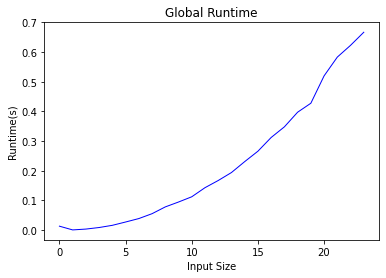

In [696]:
import time 
import random 
import matplotlib.pyplot as plt

num_tests = 5 # #number of tests to run
lst_sizes = np.arange(1, 25, 1) #generate lists of size 1 to 100
times = []
amino_acids = ['A','C', 'G', 'T']

def global_experimental_plot(approach): # converted into function to easily replicate for both approaches
    for a in range(len(lst_sizes)):
        average_times = []
        for b in range(num_tests):
            random_strings = []
            for c in range(a):
                random_string = ""
                for i in range(random.randint(76,100)):
    # scientifically, 76 is the lowest amount of base pairs 
    
                    random_string += random.choice(amino_acids)
                random_strings.append((i,random_string))
            start = time.time() # start time
            random_matrix = levenshtein_matrix(random_strings)
            approach(random_matrix)
            average_times.append(time.time() - start) # included the end time here for efficiency
        times.append(sum(average_times)/num_tests) # appends the average time taken into the final times list )

    plt.plot(times, color="blue",  linewidth=1.0)
    plt.title('Global Runtime')
    plt.xlabel('Input Size')
    plt.ylabel('Runtime(s)')
    plt.show()

global_experimental_plot(global_approach)

### Complexity Analysis
<br>
From examining and analysing the graph above, the scaling growth of the function is approximately <b>Big-O(n^2)</b>. <br>
<br>
As we can see from the plot above, the runtime for 10 input size i.e. a list of 10 gene strings when run in this approach lead to a runtime of approximately somewhere between 0.10-0.15seconds. Similarly, the runtime at 20 input size (i.e. double of the first one) is approximately 0.5seconds. <br>
<br>
This means that the global approach for increasing input size is scaling approximately Big-O(n^2). Thus, the runtime of this algorithm increases as the square of the input size, making it slower for larger inputs and potentially impractical for certain applications.

## Question 5: Estimating Probabilities 

In [671]:
def operations_calculator(gene1, gene2):   
    """
    Calculates the number of insertions, deletions, and replacements required to transform gene1 into gene2.
    
    Inputs:
    - gene1: (str) The first gene string.
    - gene2: (str) The second gene string.
    
    Output:
    - A numpy array of the form [insertions, deletions, replacements].
    """
    
    gene1_length = len(gene1)
    gene2_length = len(gene2)
    
    # rewriting the code for the matrix to adapt for this function
    matrix = [[0] * (gene2_length + 1) for j in range(gene1_length + 1)]

    # Fill the last column and last row of the matrix, respectively
    for row in range(gene1_length + 1):
        matrix[row][gene2_length] = gene1_length - row
    for column in range(gene2_length + 1):
        matrix[gene1_length][column] = gene2_length - column

    # Fill the rest of the matrix bottom up
    for row in range(len(gene1) - 1, -1, -1):
        for column in range(len(gene2) - 1, -1, -1):
            if gene1[row] == gene2[column]:
                matrix[row][column] = matrix[row+1][column+1]
            else:
                matrix[row][column] = 1 +min(matrix[row][column+1], matrix[row+1][column], matrix[row+1][column+1])
                
    insertions, deletions, replacements = 0 # initializing the values to 0 
    
    i, j = 0, 0 
    while i <= gene1_length and j <= gene2_length: 
        if i == gene1_length: 
            insertions += gene2_length - j 
            break 
        elif j == gene2_length: 
            deletions += gene1_length - i 
            break 
        elif gene1[i] == gene2[j]: 
            i += 1 
            j += 1 
        else: 
            if matrix[i][j] == matrix[i+1][j] + 1: 
                deletions += 1 
                i += 1 
            elif matrix[i][j] == matrix[i][j+1] + 1: 
                insertions += 1 
                j += 1 
            else: 
                replacements += 1 
                i += 1 
                j += 1 
 
    return np.array([insertions,deletions,replacements])

operations_calculator(gene1, gene2)

array([10,  2, 10])

## Operations Calculator Function

### Algorithmic Strategy

The code uses the Levenshtein distance to calculate the number of insertions, deletions, and replacements needed to transform gene1 into gene2 by iterating through the two strings and comparing their characters. <br>

• When it encounters a mismatch, it checks the value in the Levenshtein distance matrix at the current position and uses that value to determine whether to insert, delete, or replace the character in gene1 in order to match the character in gene2. <br>
<br>
• For example, if the value in the matrix is equal to the value in the cell below the current cell, that indicates that a deletion is needed at the current position in gene1 in order to match gene2. <br>
• Similarly, if the value in the matrix is equal to the value in the cell to the right of the current cell, that indicates that an insertion is needed at the current position in gene1 in order to match gene2. <br>
• Finally, if the value in the matrix is equal to the value in the cell to the bottom-right of the current cell, that indicates that a replacement is needed at the current position in gene1 in order to match gene2.

In [659]:
strings = [('a', 'ACAGCAAGCCATTCCTTAGAGAACGAAATTACGGCGACCGTCAGGGGCATAGCTCCGAGGCATACACTGACGTGTTGGGA'),
('b', 'CAGCAGCACAGTCCTGAGATAGCGAAATGAACCGCGACCGTCAGGGGCCTTCGGCCTCCCGAGGTATTACGGCTGACAGTGGTTGGGA'),
('c', 'GCACCAAGCCTTCACTAGAGGAACCCAGAACTAAGGGTCAGACCGTGTCGGGCCATGCATGCCGAGGTATTACGGACTAGTACGA'),
('d', 'CAGCAGCACAGTCCTGAGATGACGAAATTAACCGGCGACCGTCAGGGGCCATAGCCTCCGGGGCATACGACTGACGTGGTGGGA'),
('e', 'GCAGCAAGCCTTCACTTAGAGAACCGAAACTAGGGCAGACGGTCGGGCATGCATGCCGAGGATATACGGACTAGTACGGGA'),
('f', 'GCTAGCACAAGCCTTCACTTAGATGAACCTAAACTAGGCAGACGGGTCGGCAAGCATAGTCCGAGGATATACAGCGACTAGTACGGG'),
('g', 'CAGCAGACAGCTCCTTGTGATGAACGAAATCAACCGGCGACCATGCAGGCGGCCATAGCCTCCGGTGGCATCACGACTGAGCCGTGGTGGA')]

In [691]:
import string

def calculate_probabilities(ancestry_tree):
    """
    Returns the probability of insertion, deletion, and substitution for global tree.

    Parameters:
        – ancestry_tree: list
        List of genes ordered according to the generational hierarchy.

    Returns:
        – Numpy Array
        An array which includes the ratio of insertions, deletions, and substitutions.
    """
    
    probabilities = np.array([0.0, 0.0, 0.0])
    
    # Iterate over the number of generations – tree depth
    
    for generation in range(3):
        
        # parent node
        parent_index = string.ascii_lowercase.find(ancestry_tree[generation])
        if parent_index != -1:
            parent = strings[parent_index][1]

        # its child nodes
        first_child_index = string.ascii_lowercase.find(ancestry_tree[2*generation+1])
        if first_child_index != -1:
            first_child = strings[first_child_index][1]

        second_child_index = string.ascii_lowercase.find(ancestry_tree[2*generation+2])
        if second_child_index != -1:
            second_child = strings[second_child_index][1]
        
        # calculate exact mutation numbers
        mutation_left_child = operations_calculator(parent,first_child)
        mutation_right_child = operations_calculator(parent,second_child)
        
        # calculate mutation ratios with respect to original node
        probabilities += mutation_left_child / len(parent)
        probabilities += mutation_right_child / len(parent)
    
    return (probabilities/6) * 100

calculate_probabilities(global_approach(my_matrix))

array([9.39079953, 4.10898001, 4.90042622])

### Interpretation
<br>
The final probabilities are as follows:<br>
• Insertion: 9.3%<br>
• Deletion: 4.1%<br>
• Replacement: 4.9%<br>
<br>
The probabilities we have calculated indicate that we are making more insertions than other types of operations when transforming our parent genes to child genes. This suggests that our child genes have a longer average length than their parent genes. The small ratio between the number of insertions and deletions suggests that both operations have a similar likelihood of occurring.<br>
<br>
These probabilities can be used to predict potential changes or additions to the genome tree if we were to insert new child nodes. For example, we could use these probabilities to construct new gene sequences from a parent node, taking into account the likelihood of insertions, deletions, and replacements.<br>
<br>
Additionally, the relatively low probabilities suggest that we are doing a minimal number of operations when transforming a parent gene to a child gene. This also suggested that the solution presented by the global approach is likely optimised. If we were to construct a tree with lower probabilities, we could argue that the ordering of that tree would be more optimal compared to our current tree.<br>
<br>
However, it is important to keep in mind that these probabilities are only applicable to the subset of genes we have been given, and may not be representative of the overall genetic population. As such, we should be cautious when making any broad conclusions based on these probabilities.<br>
<br>

## Question 6: HC/LO Appendix

### LOs

• <b>#cs110-ComputationalCritique:</b> In my assignment, I successfully applied the above outcomes to evaluate and compare the time-complexity of different algorithms used to identify gene mutation by computing the Levenshtein distance. Additionally, I provided an in-depth analysis of the time resources needed by each algorithm. <br>
• <b>#cs110-ComplexityAnalysis:</b> In the complexity analysis, I clearly and accurately derived the scaling growth of my global approach while also interpreting its results and how it affects the efficency and applicability in different contexts and uses. Additionally, I provide a clear and accurate explanation of the recurrence relation of the functions provided in the assignment with their interpretations. <br>
• <b>#cs110-Professionalism:</b> I've communicated the work in this assignment in an effective, clear, and concise manner such that clear insights are provided such as each of the different functions are supported by a clearly communicated explanation that allow for clear insights. <br>
• <b>#cs110-PythonProgramming:</b> In my programming, the code for LCS, Levenshthein, their matrices, and approaches are is accurate; added three more assertion statements (in addition to the 3 provided in the assignment) for LCS demonstrate that the implementation is correct. This is the LO that I've had the most progress in this semester. Despite still not being able to write perfect, efficient code, I've made tremendous improvement in my coding ability from starting Minerva last year with zero coding experience to now being able to write these hundreds of lines of code. <br>
• <b>#cs110-CodeReadability:</b> The code written in this assignment includes clear and correct variable names; is supplemented by a descriptive docstring and inlcudes an approprapriate amount of comments (reduce from the previous assignments where I received feedback about excessive comments). Additionally, assert statements were added to the LCS and Levenshtein function to check for their validity.  <br>
• <b>#cs110-AlgoStratDataStruct:</b> I've thoroughly applied this LO in this assignment. Every code/function programmed in this assignment is supported by an explanation of how it works and the algorithmic strategy behind it that is explained in simple, plain language. <br>

### HCs
• <b>#algorithms:</b> Throughout this assignment, I've proficiently implemented this HC by clearly identifying the adequate algorithmic strategies while justifying their choice as well as providing a clear, detailed, and appropriate explanation of how it works and each of its steps through text in Markup cells, comments in the codecells, and detailed docstrings. <br>
• <b>#probability:</b> I accurately wrote code for the function to compute the probabilities of the different mutations and explained it appropriately; additionally, I clearly and correctly interpreted what the different probabilities suggest and what inferences we can possibly draw from them. <br>
• <b>#evidencebased:</b> I've supported my analysis in this assignment by ensuring that they were evidenced-based, wherever plausible. For instance, I included the assumptions/constraints of the use of the algorithm in real-life applications and the assumptions (i.e. genetic drift) that are supported by scientific evidence; additionally, I limited my random string generator to the lowest of 76 length as that is the lowest amount of base pairs (which vary from 76 to upto 2 million). 

### References
• Bibliography Ito, Hidetaka. “Plant Models of Transgenerational Epigenetic Inheritance.” Transgenerational Epigenetics, 2014, 147–61. https://doi.org/10.1016/b978-0-12-405944-3.00012-x.<br>
• Khanacademy.org. “Khan Academy,” 2022. https://www.khanacademy.org/science/ap-biology/natural-selection/population-genetics/a/genetic-drift-founder-bottleneck.<br>
• Minuteman. “Levenshtein Edit Distance in Python | Dynamic Programming | LeetCode | Zelda.” YouTube Video. YouTube, July 11, 2020. https://www.youtube.com/watch?v=SqDjsZG3Mkc&t=77s.<br>
• Wikipedia Contributors. “Base Pair.” Wikipedia. Wikimedia Foundation, November 23, 2022. https://en.wikipedia.org/wiki/Base_pair.———. “Levenshtein Distance.” Wikipedia. Wikimedia Foundation, October 14, 2022. <br>
•https://en.wikipedia.org/wiki/Levenshtein_distance#:~:text=Informally%2C%20the%20Levenshtein%20distance%20between,considered%20this%20distance%20in%201965.<br>